In [3]:
!pip install opencv-python pandas numpy matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 4.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 4.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


### Init

In [69]:
import os, sys
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

BASE_PATH = os.getcwd()
DATA_PATH = os.path.join(BASE_PATH, 'data')
IMG_PATH = os.path.join(DATA_PATH, 'trachea')
PLOT_PATH = os.path.join(DATA_PATH, 'output', 'plot_cv')

### Definitions

In [2]:
probe_length = 0.02028  # The length of the probe in meters
probe_width = 0.002  # The width of the probe in meters
probe_offset_x = 0.00221
probe_offset_y = 0

focal_length = 0.00275  # The focal length of the camera in mm
sensor_width = 0.00645  # The width of the camera sensor in mm
sensor_height = 0.00363  # The height of the camera sensor in mm

probe_base_center = (0, 1241)
probe_base_height = 225
probe_base_width = int(probe_base_height * 0.72)


probe_tip_center = (1110, 1235)
probe_tip_height = 70
probe_tip_width = int(probe_tip_height * 0.88)
probe_tip_left = (probe_tip_center[0] - 70, probe_tip_center[1])

min_probe_length = 0.005169

In [97]:
def plt_img(image, title=None, save_path=None):
    scale2x = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    plt.figure(figsize=(6, 4))
    plt.imshow(image)
    if title is not None:
        plt.title(title, fontsize=24)
    plt.axis('off')
    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0.11, dpi=300)
    plt.show()
    plt.close()

### Execute

In [4]:
src_image = cv2.imread(os.path.join(IMG_PATH, os.listdir(IMG_PATH)[0]), cv2.IMREAD_UNCHANGED)
src_image = cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB)

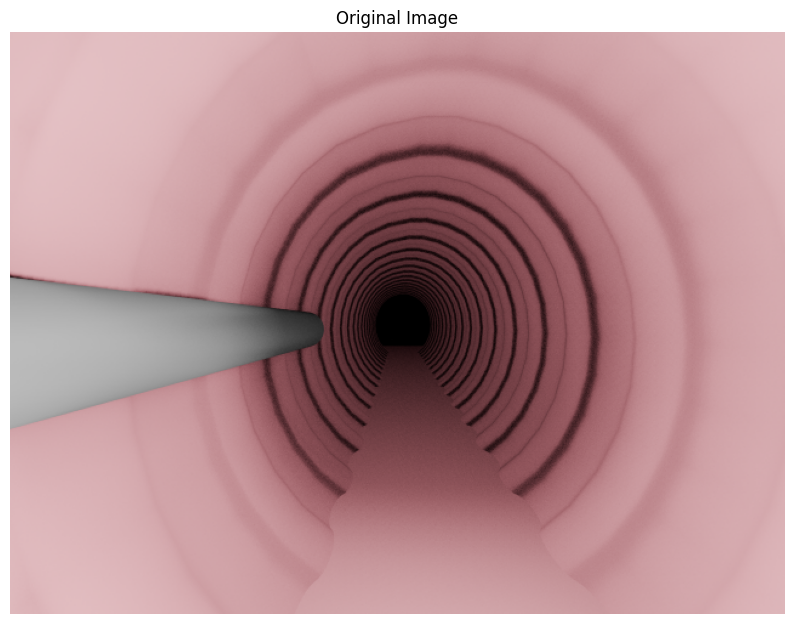

In [5]:
plt_img(src_image, 'Original Image')

In [ ]:
im = src_image.copy()
imgray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

# create jupyter notebook sliders for thresholding

def nothing(x):
    pass

cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 0, 255, nothing)
cv2.createTrackbar('max_value', 'image', 0, 255, nothing)
cv2.createTrackbar('block_size', 'image', 0, 255, nothing)
cv2.createTrackbar('C', 'image', 0, 255, nothing)


cv2.setTrackbarPos('threshold', 'image', 80)
cv2.setTrackbarPos('max_value', 'image', 255)
cv2.setTrackbarPos('block_size', 'image', 11)
cv2.setTrackbarPos('C', 'image', 2)

while True:
    # get current positions of four trackbars
    threshold = cv2.getTrackbarPos('threshold', 'image')
    max_value = cv2.getTrackbarPos('max_value', 'image')
    block_size = cv2.getTrackbarPos('block_size', 'image')
    C = cv2.getTrackbarPos('C', 'image')

    # apply thresholding
    if block_size % 2 == 0:
        block_size += 1

    # apply canny
    canny = cv2.Canny(imgray, threshold, max_value)
    
    ret, thresh = cv2.threshold(canny, threshold, max_value, cv2.THRESH_BINARY)

    # show the image
    cv2.imshow('image', thresh)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('thresholded_image.png', thresh)
        print('Image saved!')
    elif k == ord('c'):
        # apply adaptive thresholding
        thresh = cv2.adaptiveThreshold(imgray, max_value, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, block_size, C)
        cv2.imshow('image', thresh)
        k = cv2.waitKey(1) & 0xFF
        

ret, thresh = cv2.threshold(imgray, 80, 80, 80)

plt_img(thresh, 'Threshold Image')

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

KeyboardInterrupt: 

: 

In [6]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contim = im.copy()
for contour in contours:
    # random color
    color = np.random.randint(0, 255, (3)).tolist()
    # draw contours
    contim = cv2.drawContours(contim, contour, -1, color, 3)
    
plt_img(contim, 'Threshold Image')

NameError: name 'thresh' is not defined

#### Real

##### Preprocessing filters

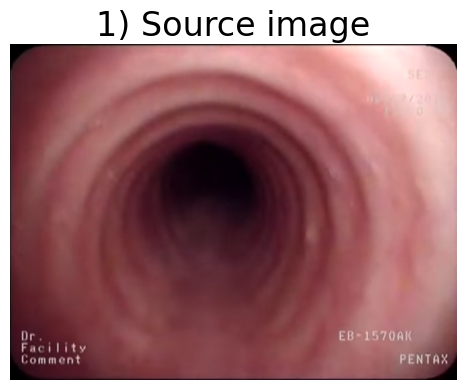

In [110]:
src_image = cv2.imread(os.path.join(IMG_PATH, os.listdir(IMG_PATH)[1]), cv2.IMREAD_UNCHANGED)
src_image = cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB)
plt_img(src_image, '1) Source image', save_path=os.path.join(PLOT_PATH, '01_source_image.pdf'))

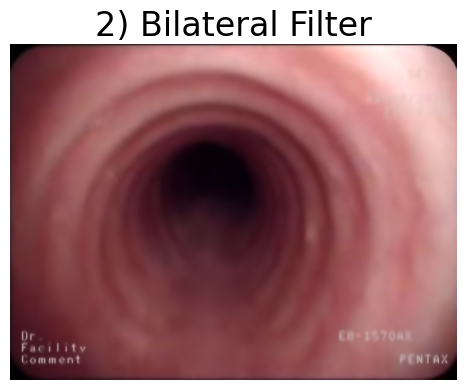

In [100]:
d = 12
sigmaColor = 150
sigmaSpace = 150

im1 = cv2.bilateralFilter(src_image, d, sigmaColor, sigmaSpace)
plt_img(im1, '2) Bilateral Filter', save_path=os.path.join(PLOT_PATH, '02_bilateral_filter.pdf'))

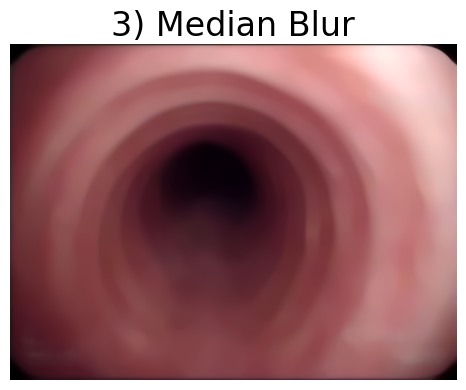

In [101]:
k_size = 41

im2 = cv2.medianBlur(im1, k_size)
plt_img(im2, '3) Median Blur', save_path=os.path.join(PLOT_PATH, '03_median_blur.pdf'))

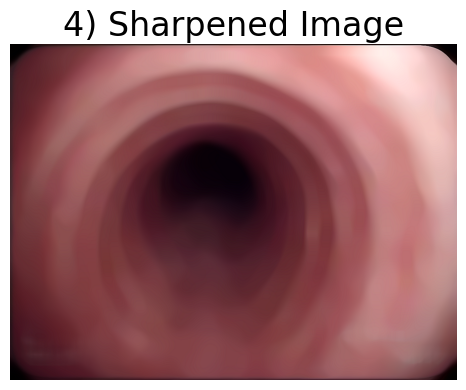

In [102]:
# Example sharpening kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Apply the sharpening kernel
im3 = cv2.filter2D(im2, -1, sharpen_kernel)

# Display the sharpened image
plt_img(im3, '4) Sharpened Image', save_path=os.path.join(PLOT_PATH, '04_sharpened_image.pdf'))

##### Canny edge detection + blur + threshold

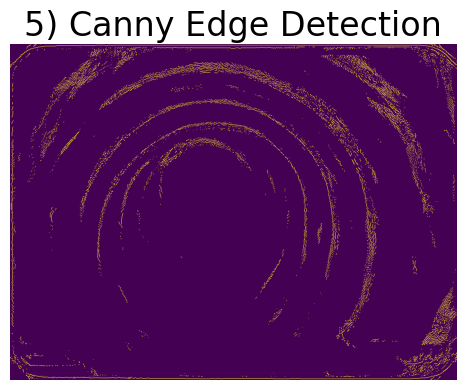

In [103]:
im4 = cv2.cvtColor(im3, cv2.COLOR_RGB2GRAY)
im4 = cv2.GaussianBlur(im4, (5, 5), 0)

thereshold1 = 10
thereshold2 = 10
aperture_size = 3


im4 = cv2.Canny(im4, thereshold1, thereshold2, aperture_size)
plt_img(im4, '5) Canny Edge Detection', save_path=os.path.join(PLOT_PATH, '05_canny_edge_detection.pdf'))


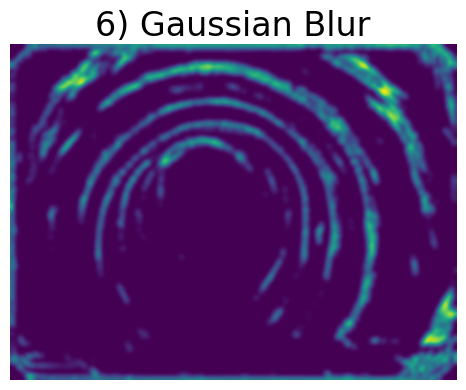

In [104]:
# apply gauss blur

im5 = cv2.GaussianBlur(im4, (5, 5), 0)
im5 = cv2.GaussianBlur(im5, (5, 5), 0)
im5 = cv2.GaussianBlur(im5, (5, 5), 0)
im5 = cv2.GaussianBlur(im5, (7, 7), 0)
im5 = cv2.GaussianBlur(im5, (21, 21), 5)
plt_img(im5, '6) Gaussian Blur', save_path=os.path.join(PLOT_PATH, '06_gaussian_blur.pdf'))


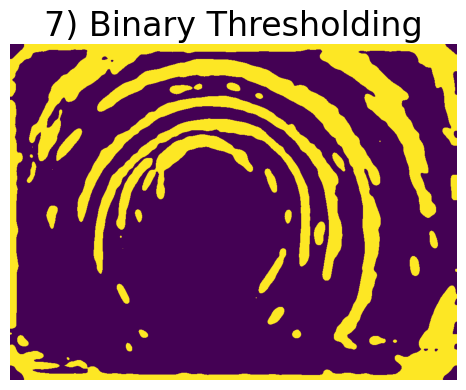

In [105]:
# binary thresholding

ret, im6 = cv2.threshold(im5, 5, 255, cv2.THRESH_BINARY)

plt_img(im6, '7) Binary Thresholding', save_path=os.path.join(PLOT_PATH, '07_binary_thresholding.pdf'))

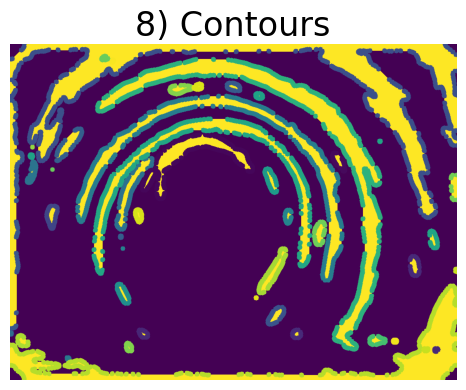

In [106]:
# find contours

contours, hierarchy = cv2.findContours(im6, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contim = im6.copy()
for contour in contours:
    # random color
    color = np.random.randint(0, 255, (3)).tolist()
    # draw contours
    contim = cv2.drawContours(contim, contour, -1, color, 10)
    
plt_img(contim, '8) Contours', save_path=os.path.join(PLOT_PATH, '08_contours.pdf'))

##### Define the mock probe dimensions and position

In [37]:
# probe_tip_right = [int(im1.shape[1]*0.725), int(im1.shape[0]*0.5)]
# probe_tip_right = [int(im1.shape[1]*0.8), int(im1.shape[0]*0.5)]

probe_tip_right = [int(im1.shape[1]*0.66), int(im1.shape[0]*0.5)]

probe_width = 2  # The width of the probe in mm
probe_width_px = 61 # mock value (will be computed from the image)
# probe_width_px = 78 # mock value (will be computed from the image)
px_to_mm = probe_width / probe_width_px


def draw_probe_tip_right(im, probe_tip_right, markerSize=20, thickness=2):
    # draw probe tip right as a cross
    return cv2.drawMarker(im, tuple(probe_tip_right), color=(0, 0, 255), markerType=cv2.MARKER_CROSS,
                   markerSize=markerSize, thickness=thickness)
    

im7 = im6.copy()
im7 = cv2.cvtColor(im7, cv2.COLOR_GRAY2RGB)
im7 = draw_probe_tip_right(im7, probe_tip_right)
# plt_img(im7, 'Probe Image')

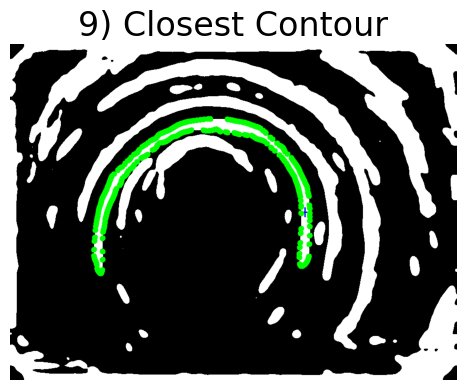

In [107]:
# find contour that is closest to probe tip right

def find_closest_contour(contours, probe_tip_right):
    closest_contour = None
    closest_distance = float('inf')
    for contour in contours:
        # calculate the distance between the contour and the probe tip right
        distance = cv2.pointPolygonTest(contour, (probe_tip_right[0], probe_tip_right[1]), True)
        distance = abs(distance)
        # temp = im7.copy()
        # temp = cv2.drawContours(temp, contour, -1, (0, 255, 0), 3)
        # # print(distance,  closest_distance, distance < closest_distance)
        # plt_img(contim, 'Closest Contour Image')
        if distance < closest_distance:
            closest_distance = distance
            closest_contour = contour
    return closest_contour

closest_contour = find_closest_contour(contours, probe_tip_right)
contim = im7.copy()
contim = cv2.drawContours(contim, closest_contour, -1, (0, 255, 0), 12)
plt_img(contim, '9) Closest Contour', save_path=os.path.join(PLOT_PATH, '09_closest_contour.pdf'))

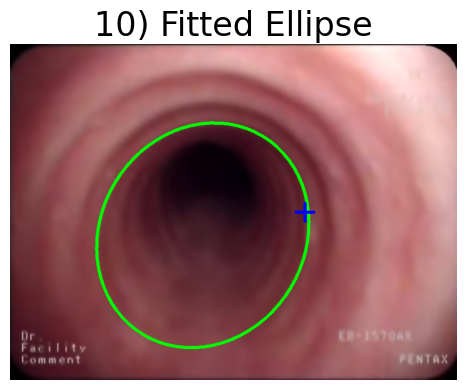

Ellipse dimensions (px):  (450.81427001953125, 510.0826721191406)
Ellipse dimensions (mm):  (14.780795738345288, 16.724022036693135)


In [108]:
# fit an ellipse to the contour
ellipse = cv2.fitEllipse(closest_contour)
contim = im1.copy()
contim = cv2.ellipse(contim, ellipse, (0, 255, 0), 5)
contim = draw_probe_tip_right(contim, probe_tip_right, markerSize=40, thickness=5)
plt_img(contim, '10) Fitted Ellipse', save_path=os.path.join(PLOT_PATH, '10_fitted_ellipse.pdf'))

# print ellipse dimensions
print('Ellipse dimensions (px): ', ellipse[1])
ellipse_mm = (ellipse[1][0] * px_to_mm, ellipse[1][1] * px_to_mm)
print('Ellipse dimensions (mm): ', ellipse_mm)


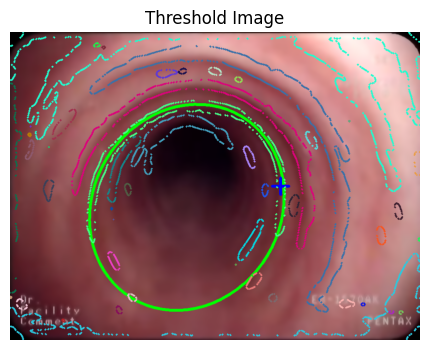

In [93]:
for contour in contours:
    # random color
    color = np.random.randint(0, 255, (3)).tolist()
    # draw contours
    contim = cv2.drawContours(contim, contour, -1, color, 3)
plt_img(contim, 'Threshold Image')

In [95]:
for plot in os.listdir(PLOT_PATH):
    print(f"images/06_trach_cv/{plot}")

images/06_trach_cv/01_source_image.pdf
images/06_trach_cv/02_bilateral_filter.pdf
images/06_trach_cv/03_median_blur.pdf
images/06_trach_cv/04_sharpened_image.pdf
images/06_trach_cv/05_canny_edge_detection.pdf
images/06_trach_cv/06_gaussian_blur.pdf
images/06_trach_cv/07_binary_thresholding.pdf
images/06_trach_cv/08_contours.pdf
images/06_trach_cv/09_closest_contour.pdf
images/06_trach_cv/10_fitted_ellipse.pdf


## Experiments

(740, 984, 4) (779, 1016, 4)


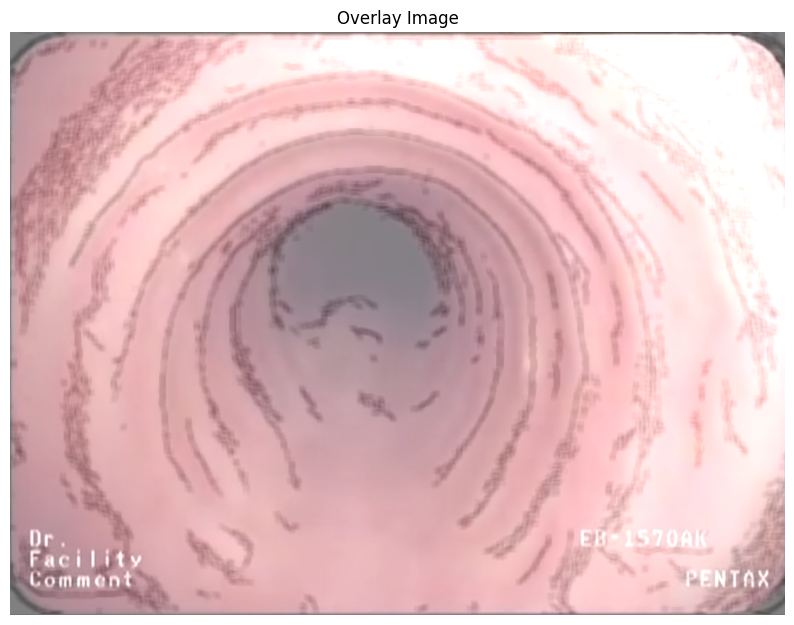

In [43]:
src_image = cv2.imread(os.path.join(DATA_PATH, 'trachea/real.png'), cv2.IMREAD_UNCHANGED)
src_image = cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB)

canny_image = cv2.imread(os.path.join(DATA_PATH, 'trachea/realGaus3.png'), cv2.IMREAD_UNCHANGED)
canny_image = cv2.cvtColor(canny_image, cv2.COLOR_BGR2RGB)
canny_image = canny_image[:, :, 0]

#make the black background of canny_image transparent
canny_image = cv2.cvtColor(canny_image, cv2.COLOR_GRAY2RGBA)
canny_image[:, :, 3] = canny_image[:, :, 0]
canny_image = cv2.bitwise_not(canny_image)

# plt_img(canny_image, 'Original Image')

# overlay on the original image
src_image = cv2.cvtColor(src_image, cv2.COLOR_RGB2RGBA)
print(src_image.shape, canny_image.shape)
# reshape the canny image to match the original image
canny_image = cv2.resize(canny_image, (src_image.shape[1], src_image.shape[0]), interpolation=cv2.INTER_CUBIC)
# overlay the canny image on the original image
overlay = cv2.addWeighted(src_image, 0.8, canny_image, 0.5, 0)
plt_img(overlay, 'Overlay Image')


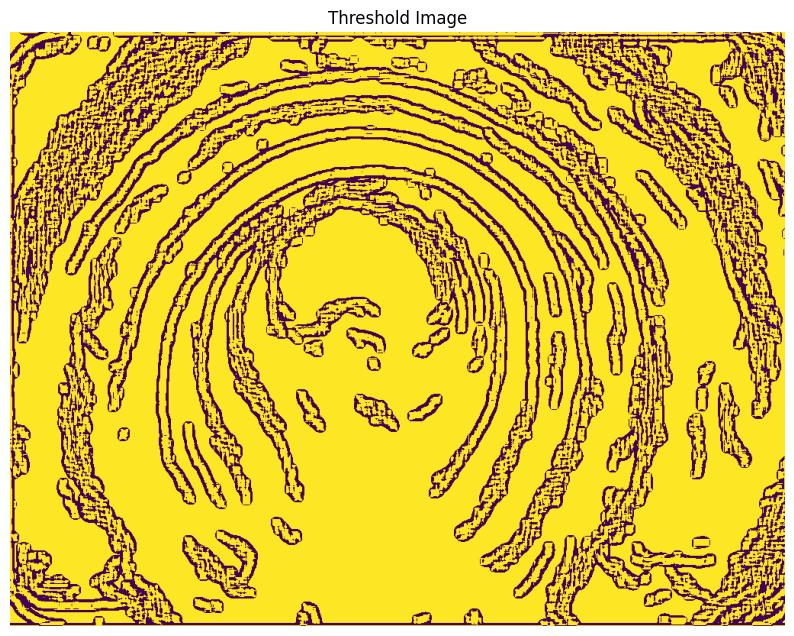

In [6]:
im = src_image.copy()
imgray = im[:, :, 0]

thresh = cv2.adaptiveThreshold(imgray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)



plt_img(thresh, 'Threshold Image')

